# Beispiel 18.3: Übergang von schneller zu momentaner Reaktion
Bearbeitet von Franz Braun

Dieses Beispiel befindet sich im Lehrbuch auf den Seiten 278 - 279. Die Nummerierung
der verwendeten Gleichungen entspricht der Nummerierung im Lehrbuch. Das hier angewendete
Vorgehen entspricht dem im Lehrbuch vorgestellten Lösungsweg.

Zunächst werden die benötigten Pakete importiert.

In [25]:
### Import
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

Anschließend wird die dimensionslose Materialbilanz für eine Reaktion 2. Ordnung (Gleichung 18.15a) und die dazugehörigen Randbedingungen (Tabelle 18.1) in jeweils einer Funktion implementiert.

In [26]:
def material(X,y):
    '''
    Dimensionslose Materialbilanz für die Reaktion 2.Ordnung (Gleichung 18.15a)
    y[0]       : Restanteil von A1
    y[1]       : Restanteil von A2
    y[2]       : Restanteil von A3
    y[3]       : erste Ableitung des Restanteils von A1 nach der dimensionslosen Ortskoordinate
    y[4]       : erste Ableitung des Restanteils von A2 nach der dimensionslosen Ortskoordinate
    y[5]       : erste Ableitung des Restanteils von A3 nach der dimensionslosen Ortskoordinate
    dy2dX2     : zweite Ableitung der Restanteile von nach der dimensionslosen Ortskoordinate (Vektor der Größe 3)
    nu         : Stöchiometrische Koeffizienten (Vektor der Größe 3)
    omega      : dimensionslose Reaktionsgeschwindigkeit
    X          : Ortskoordinate
    '''

    omega = omega_f(y[:3])
    
    dy2dX2 = np.empty_like(y[3:])
    
    dy2dX2[0] = - Ha**2 * nu[0] * omega
    dy2dX2[1] = - Ha**2 * nu[1] * omega
    dy2dX2[2] = - Ha**2 * nu[2] * omega
    

    return np.vstack((y[3:],dy2dX2))


def bc_material(y0,y1):
    '''
    Randbedingungen der Materialbilanz (Tabelle 18.1)
    y0 : Randbedingungen bei X = 0
    y1 : Randbedingungen bei X = 1
    '''
    BC = np.empty(nu.size *2)
    # A1
    BC[0] = y0[0] - f_e[0] # f_1,L = 1
    BC[1] = y1[0]          # f_1,L = 0 
    # A2
    BC[2] = y0[4]          # df_2,L/dX = 0
    BC[3] = y1[1] - f_e[1] # f_2,L = f_2,L,b
    # A3
    BC[4] = y0[5]          # df_3,L/dX = 0
    BC[5] = y1[2] - f_e[2] # f_3,L = f_3,L,b
    
    return BC

Danach werden die stöchiometrischen Koeffizienten gemäß der Reaktionsgleichung (18.1) parametriert. Die dimensionslose Reaktionsgeschwindigkeit ergibt sich aus Gleichung (18.12e) für eine einzelne Reaktion 2. Ordnung wie folgt:

\begin{align*}
    \omega_\mathrm{L} &= \frac{r_\mathrm{1,L}}{r_\mathrm{1,e}} = \frac{k_1\,c_\mathrm{1,L}}{k_1\,c_\mathrm{1,e,L}}\frac{c_\mathrm{2,L}}{c_\mathrm{2,e,L}}
\end{align*}

Durch Umformung erhalt man einen Ausdruck auf Basis des Restanteils und des Einsatzverhältnisses:

\begin{align*}
    \omega_\mathrm{L}
    &=\frac{c_\mathrm{1,L}}{c_\mathrm{1,e,L}}\frac{c_\mathrm{2,L}}{c_\mathrm{2,e,L}}\frac{c_\mathrm{1,e,L}}{c_\mathrm{1,e,L}}  
    = \frac{c_\mathrm{1,L}}{c_\mathrm{1,e,L}}\frac{c_\mathrm{2,L}}{c_\mathrm{1,e,L}}\frac{c_\mathrm{1,e,L}}{c_\mathrm{2,e,L}}\\
    &=f_1\,f_2\,\kappa_{2}^{-1}
\end{align*}

Diese Gleichung für die dimensionslose Reaktionsgeschwindigkeit wird in eine Funktion implementiert.

In [27]:
nu      = np.array((-1,-1,1)) # Stöchiometrische Koeffizienten für A1, A2, A3 
f_e     = np.array((1,2,0))   # Restanteile am Eintritt
kappa_2 = 1                   # Einsatzverhältnis

def omega_f(f):
    '''
    Dimensionslose Reaktionsgeschwindigkeit für eine Reaktion 2. Ordnung
    f : Vektor der Restanteile 
    '''
    return f[0] * f[1] / kappa_2

Da der Einfluss sehr großer Hatta-Zahlen $(Ha)$ am Überang zwischen schneller und momentaner Reaktion betrachtet betrachtet werden soll, erfolgt die Variation entsprechender $Ha$ in einer For-Schleife. Die Profile der Restanteile werden durch den Aufruf eines Solvers für Randwertprobleme (solve_bvp) auf Grundlage der Materialbilanzen und der Randbedingungen berechnet.

In [28]:
Ha_vec   = np.array((2,5,10,20,100,1000))   # Vektor mit Hatta - Zahlen für Beispiel 18.3

Lösungen = []                               # Leere Liste zum Speichern der Lösungen für die Reaktion 2. Ordnung
N        = 101                              # Diskretisierung
X        = np.linspace(0,1,N)               # Diskretisierung der Ortskoordinate
init_f   = np.ones((3,N))                   # Startwerte für Restanteile
init_df  = np.ones((3,N))*1e-5              # Startwerte für die Ableitungen der Restanteile
init     = np.vstack((init_f,init_df))      # Zusammengefügte Startwerte für die Iterationen des Solvers

for HaHa in Ha_vec:
    Ha  = HaHa
    sol = solve_bvp(material, bc_material, X,init , max_nodes = 1e10, tol = 1e-10)
    if sol.success == False:
        print(sol)
    Lösungen.append(sol)

Lösungen = np.array((Lösungen))

 Abschließend werden die Ergebnisse grafisch veranschaulicht.

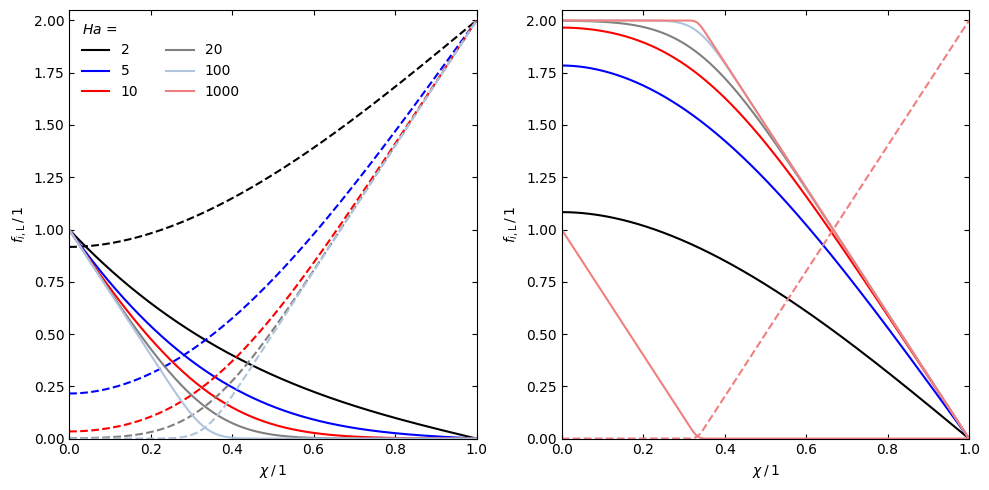

In [34]:
colors = ['black','blue','red','gray','lightsteelblue','lightcoral']

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
for Lösung, Ha, color in zip(Lösungen[:-1],Ha_vec[:-1],colors[:-1]):
    ax[0].plot(Lösung.x, Lösung.y[0], label = str(Ha), color = color)
    ax[0].plot(Lösung.x, Lösung.y[1], color = color, linestyle = '--')
    ax[1].plot(Lösung.x, Lösung.y[2], color = color)

ax[0].plot([],[],label = str(Ha_vec[-1]), color = colors[-1])
ax[1].plot(Lösungen[-1].x, Lösungen[-1].y[0], label = str(Ha), color = colors[-1])
ax[1].plot(Lösungen[-1].x, Lösungen[-1].y[1], color = colors[-1], linestyle = '--')
ax[1].plot(Lösungen[-1].x, Lösungen[-1].y[2], color = colors[-1])

ax[0].set_xlim(0,1)
ax[0].set_ylim(0,2.05)
ax[0].tick_params(axis="y",direction="in", right = True)
ax[0].tick_params(axis="x",direction="in", top = True)
ax[0].set_ylabel(r'$f_{i,\mathrm{L}}\,/\,1$')
ax[0].set_xlabel(r'$\chi \,/\,1$')
ax[0].legend(title = '$Ha$ =',frameon = False, alignment = 'left',ncol=2)


ax[1].set_ylabel(r'$f_{i,\mathrm{L}}\,/\,1$')
ax[1].set_xlabel(r'$\chi \,/\,1$')
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,2.05)
ax[1].tick_params(axis="y",direction="in", right = True)
ax[1].tick_params(axis="x",direction="in", top = True)
plt.tight_layout()
plt.show()